In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(rc={'figure.figsize':(16.0,6.0)})
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# 1-EDA :

In [2]:
df1 = pd.read_csv('C:/Users/Peter/ELECTRO PI INTERNSHIP/TASK 2/churn-bigml-80.csv')
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df2 = pd.read_csv('C:/Users/Peter/ELECTRO PI INTERNSHIP/TASK 2/churn-bigml-20.csv')
df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df1['Churn']=df1['Churn'].astype('str')
df2['Churn']=df2['Churn'].astype('str')

In [6]:
df1.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [8]:
df1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [9]:
df2.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

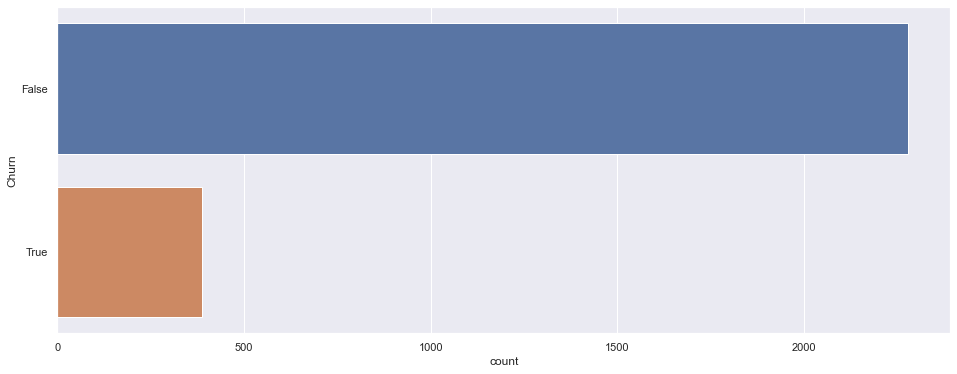

In [10]:
sns.countplot(y='Churn', data=df1)

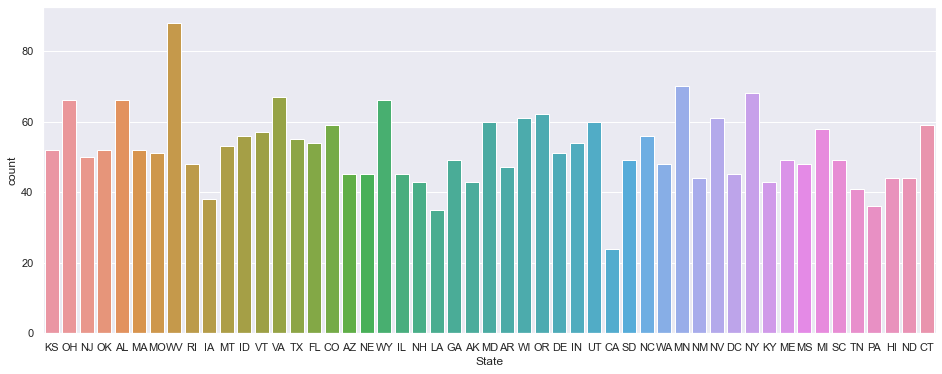

In [11]:
sns.countplot(x='State', data=df1)

In [12]:
df1['State'].nunique()

51

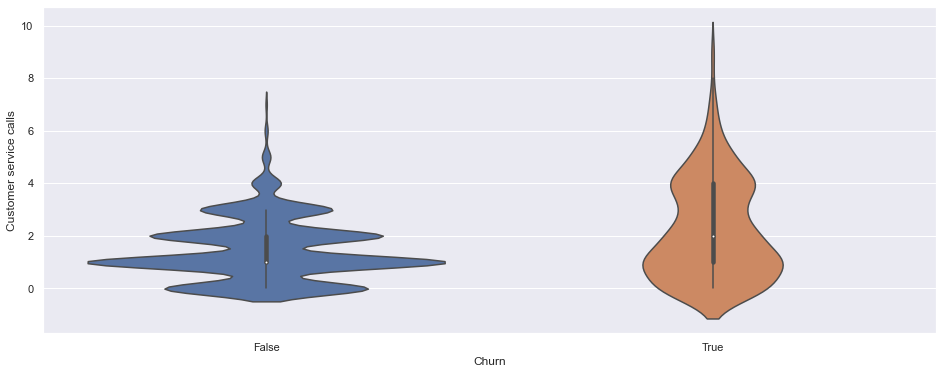

In [13]:
sns.violinplot(x="Churn", y="Customer service calls", data=df1)

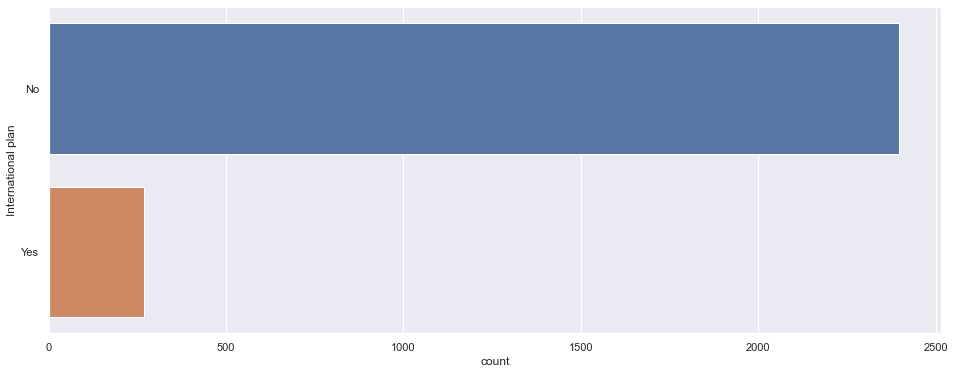

In [14]:
sns.countplot(y='International plan', data=df1)

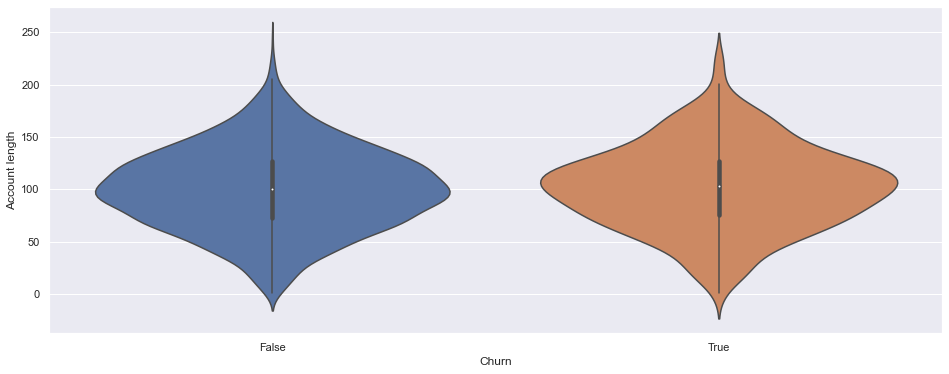

In [15]:
sns.violinplot(x="Churn", y="Account length", data=df1)

In [16]:
df1['Total charge'] = df1['Total day charge'] + df1['Total eve charge'] + df1['Total night charge'] + df1['Total intl charge']
df2['Total charge'] = df2['Total day charge'] + df2['Total eve charge'] + df2['Total night charge'] + df2['Total intl charge']

In [17]:
df1.drop(['Total day charge', 'Total eve charge','Total night charge','Total intl charge'], axis=1,inplace=True)
df2.drop(['Total day charge', 'Total eve charge','Total night charge','Total intl charge'], axis=1,inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total eve minutes       2666 non-null   float64
 9   Total eve calls         2666 non-null   int64  
 10  Total night minutes     2666 non-null   float64
 11  Total night calls       2666 non-null   int64  
 12  Total intl minutes      2666 non-null   float64
 13  Total intl calls        2666 non-null   int64  
 14  Customer service calls  2666 non-null   

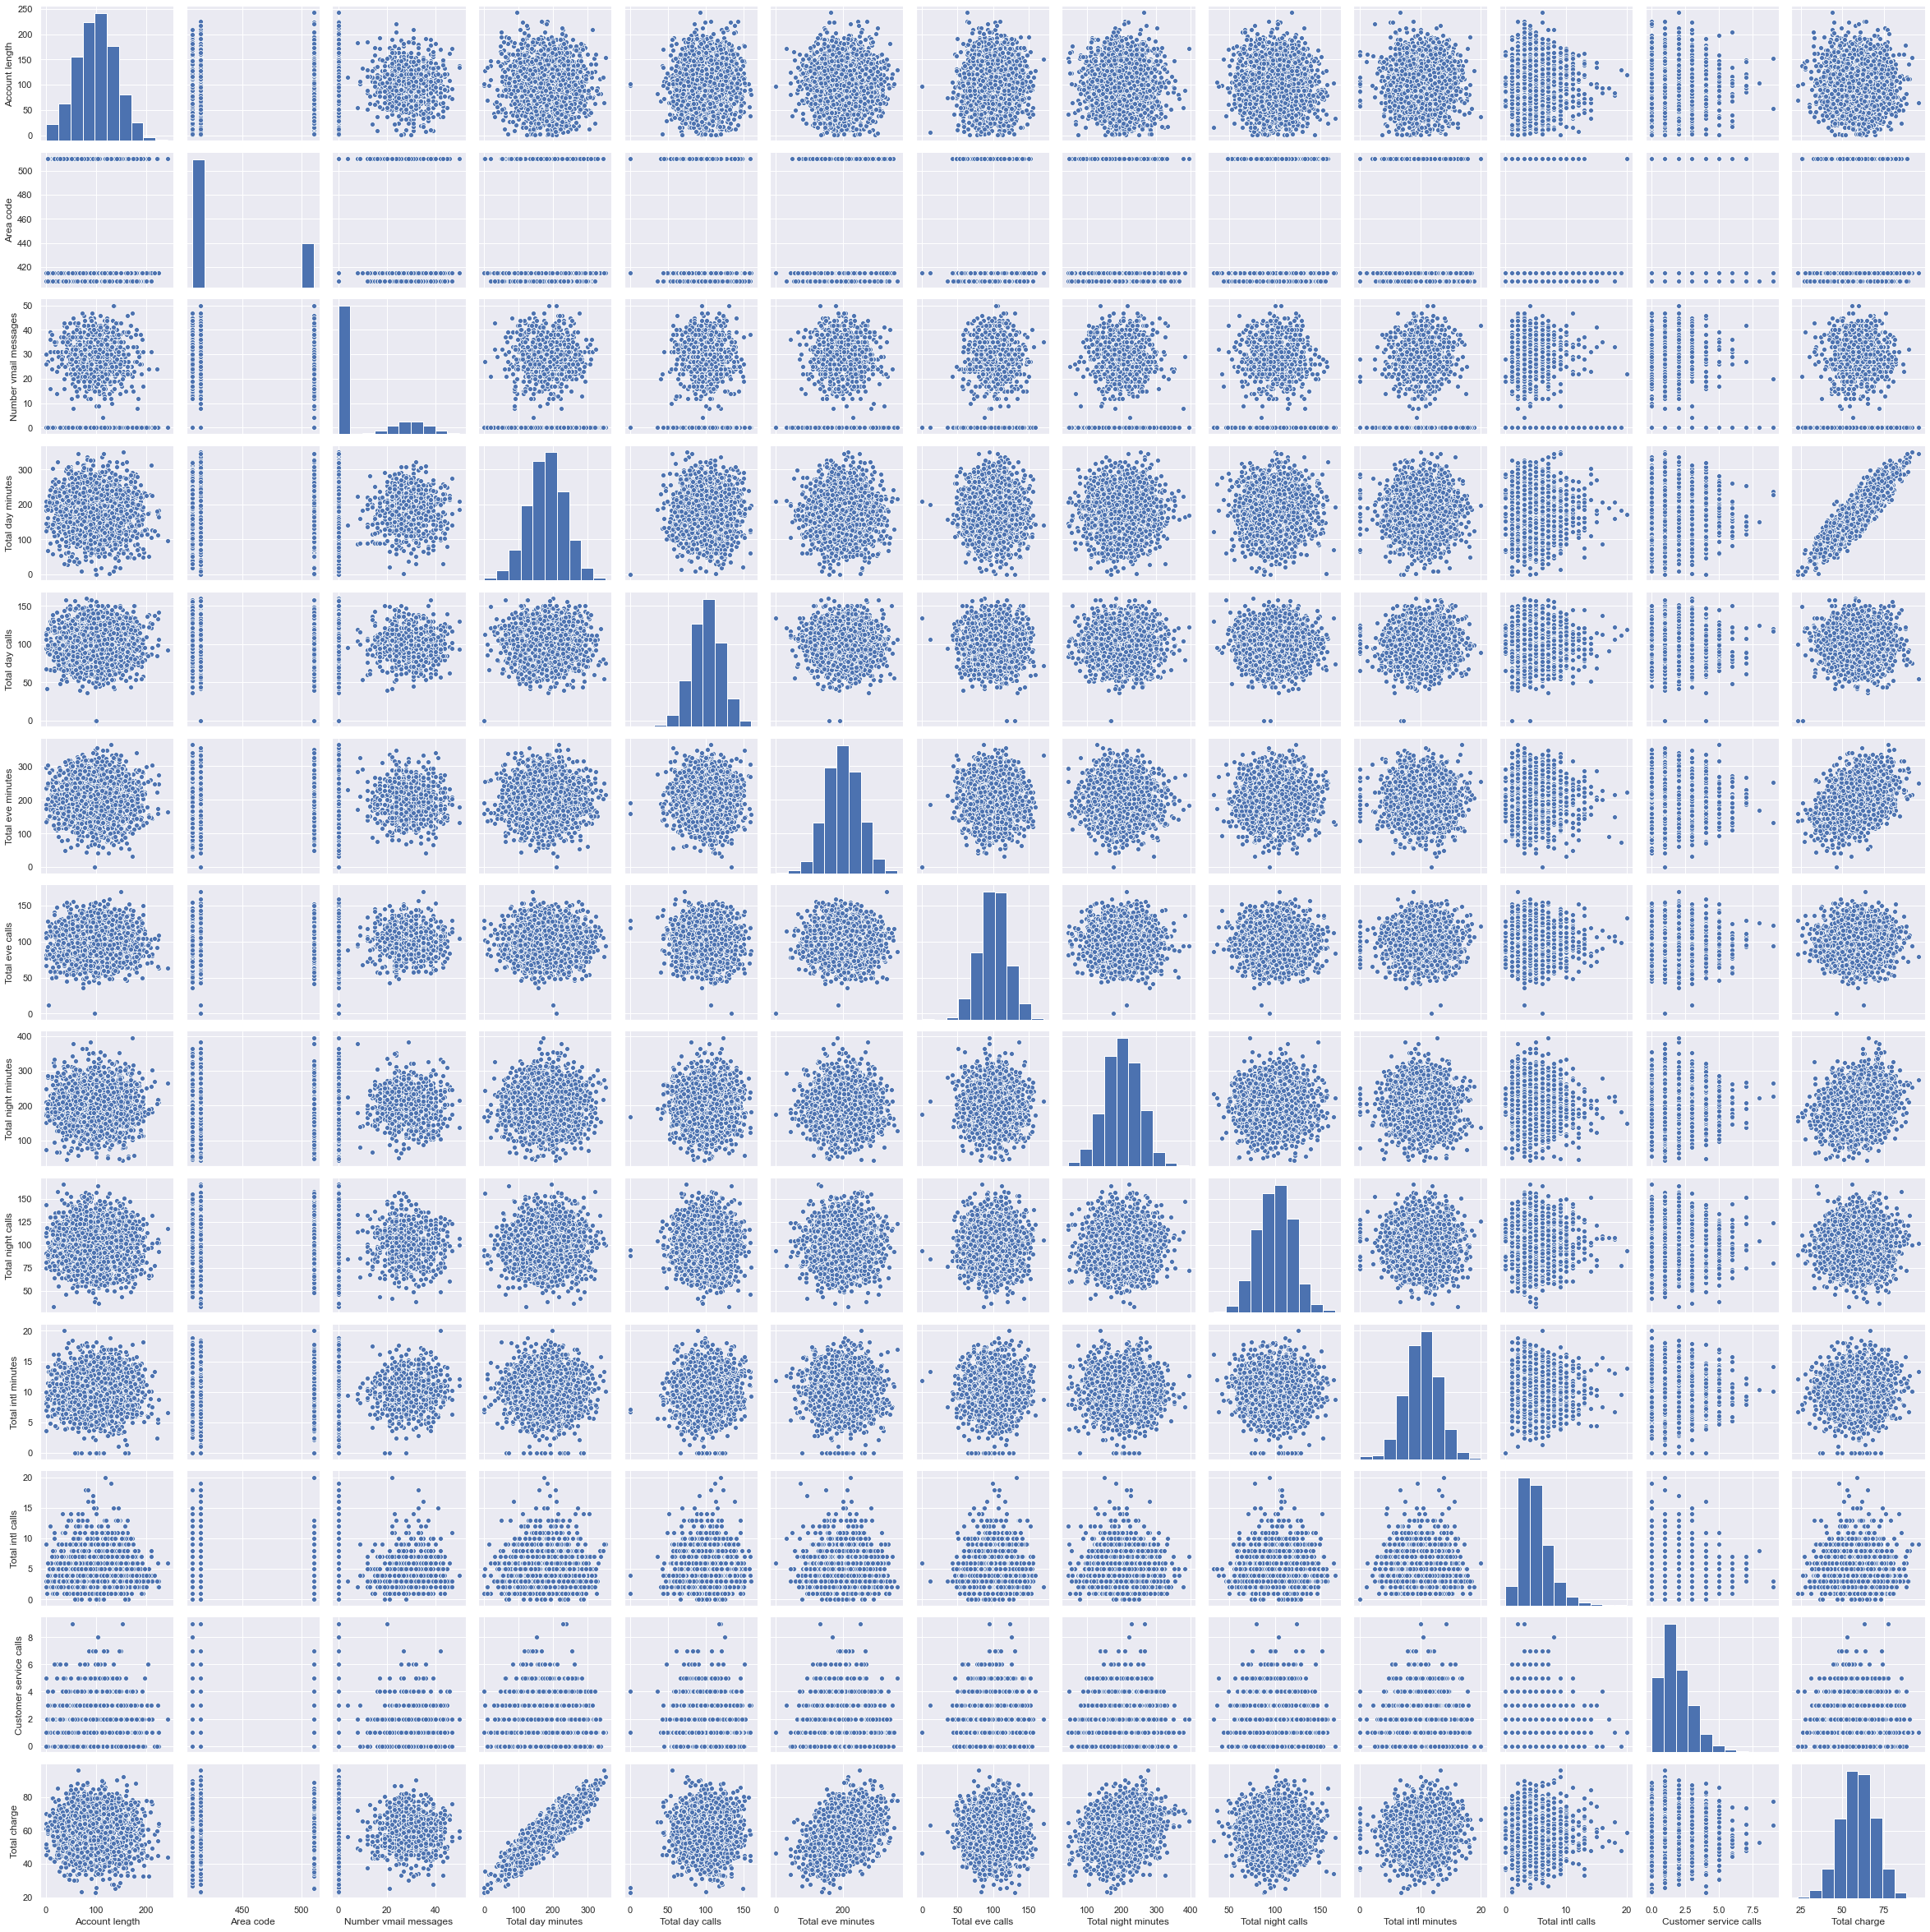

In [19]:
sns.pairplot(data=df1)

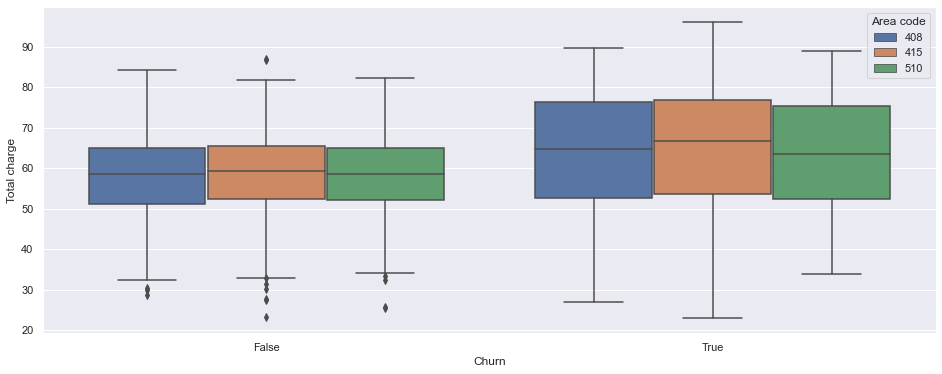

In [20]:
sns.boxplot(x="Churn", y="Total charge", hue="Area code",data=df1)

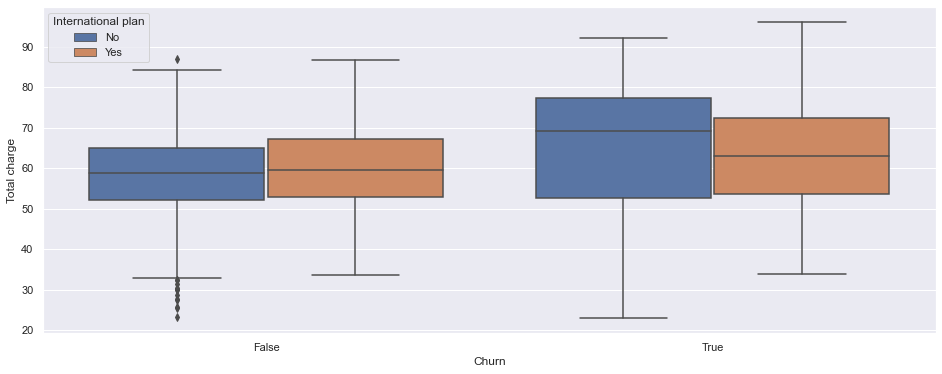

In [21]:
sns.boxplot(x="Churn", y="Total charge", hue="International plan",data=df1)

# 2-Data Cleaning:

In [22]:
df1['Churn'] = df1['Churn'].map({"True":1,"False":0})
df1['International plan'].replace(['No','Yes'],[0,1],inplace=True)

df2['Churn'] = df2['Churn'].map({"True":1,"False":0})
df2['International plan'].replace(['No','Yes'],[0,1],inplace=True)

encoder = LabelEncoder()

voice_train = encoder.fit_transform(df1['Voice mail plan'])
df1['Voice mail plan'] = voice_train

voice_test = encoder.fit_transform(df2['Voice mail plan'])
df2['Voice mail plan'] = voice_test

In [23]:
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,Total charge
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09


In [24]:
df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,Total charge
0,LA,117,408,0,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0,73.32
1,IN,65,415,0,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1,54.20
2,NY,161,415,0,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1,92.29
3,SC,111,415,0,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0,41.05
4,HI,49,510,0,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0,49.60


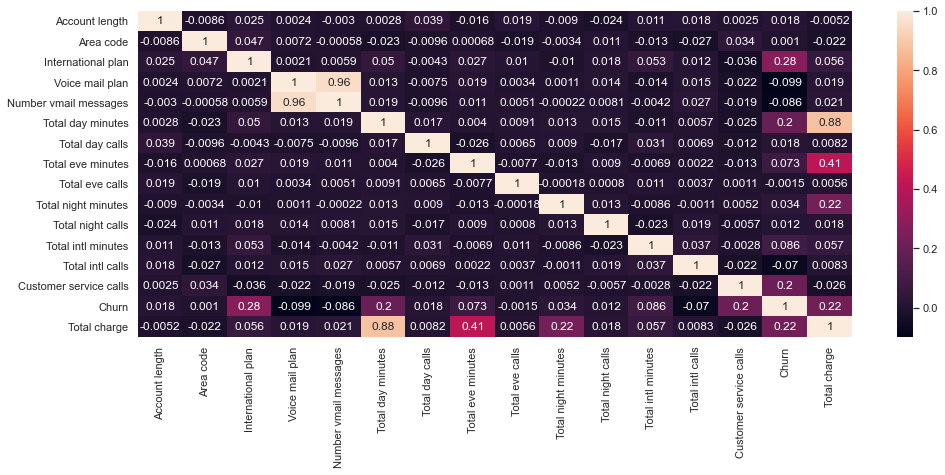

In [25]:
sns.heatmap( df1.corr() , annot =True )

In [26]:
df1.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'], inplace=True,axis=1)
df2.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'], inplace=True,axis=1)

In [27]:
feat_cols = ['International plan','Total charge','Customer service calls']
X_train = df1[feat_cols]
y_train = df1['Churn']
X_test = df2[feat_cols]
y_test = df2['Churn']

In [28]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# 3-Classification Algorithms:

In [29]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred= logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       572
           1       0.47      0.16      0.24        95

    accuracy                           0.85       667
   macro avg       0.67      0.56      0.58       667
weighted avg       0.82      0.85      0.82       667

[[555  17]
 [ 80  15]]
accuracy is 0.8545727136431784


In [30]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       572
           1       0.44      0.38      0.41        95

    accuracy                           0.84       667
   macro avg       0.67      0.65      0.66       667
weighted avg       0.83      0.84      0.84       667

[[527  45]
 [ 59  36]]
accuracy is 0.8440779610194903


In [31]:
# BernoulliNB

from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       572
           1       0.27      0.03      0.06        95

    accuracy                           0.85       667
   macro avg       0.57      0.51      0.49       667
weighted avg       0.78      0.85      0.80       667

[[564   8]
 [ 92   3]]
accuracy is 0.8500749625187406


In [32]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       572
           1       0.82      0.56      0.66        95

    accuracy                           0.92       667
   macro avg       0.87      0.77      0.81       667
weighted avg       0.91      0.92      0.91       667

[[560  12]
 [ 42  53]]
accuracy is 0.9190404797601199


In [33]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       572
           1       0.57      0.13      0.21        95

    accuracy                           0.86       667
   macro avg       0.72      0.56      0.57       667
weighted avg       0.83      0.86      0.82       667

[[563   9]
 [ 83  12]]
accuracy is 0.8620689655172413


In [34]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       572
           1       0.65      0.65      0.65        95

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

[[539  33]
 [ 33  62]]
accuracy is 0.9010494752623688


In [35]:
#K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       572
           1       0.79      0.71      0.74        95

    accuracy                           0.93       667
   macro avg       0.87      0.84      0.85       667
weighted avg       0.93      0.93      0.93       667

[[554  18]
 [ 28  67]]
accuracy is 0.9310344827586207


In [36]:
#Bagging classifier
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       572
           1       0.71      0.66      0.68        95

    accuracy                           0.91       667
   macro avg       0.83      0.81      0.82       667
weighted avg       0.91      0.91      0.91       667

[[546  32]
 [ 26  63]]
accuracy is  0.9130434782608695


In [37]:
#AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       572
           1       0.72      0.56      0.63        95

    accuracy                           0.91       667
   macro avg       0.82      0.76      0.79       667
weighted avg       0.90      0.91      0.90       667

[[551  42]
 [ 21  53]]
accuracy is  0.9055472263868066


In [38]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       572
           1       0.79      0.72      0.75        95

    accuracy                           0.93       667
   macro avg       0.87      0.84      0.86       667
weighted avg       0.93      0.93      0.93       667

[[554  27]
 [ 18  68]]
accuracy is  0.9325337331334332


In [39]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       572
           1       0.37      0.18      0.24        95

    accuracy                           0.84       667
   macro avg       0.62      0.56      0.58       667
weighted avg       0.80      0.84      0.82       667

[[543  78]
 [ 29  17]]
accuracy is  0.8395802098950524


In [40]:
#Quadratic Discriminant Analysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       572
           1       0.46      0.40      0.43        95

    accuracy                           0.85       667
   macro avg       0.68      0.66      0.67       667
weighted avg       0.84      0.85      0.84       667

[[527  57]
 [ 45  38]]
accuracy is  0.8470764617691154


In [41]:
#NN - Multi-layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       572
           1       0.78      0.53      0.63        95

    accuracy                           0.91       667
   macro avg       0.85      0.75      0.79       667
weighted avg       0.90      0.91      0.90       667

[[558  14]
 [ 45  50]]
accuracy is  0.9115442278860569


In [42]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       572
           1       0.63      0.69      0.66        95

    accuracy                           0.90       667
   macro avg       0.79      0.81      0.80       667
weighted avg       0.90      0.90      0.90       667

[[533  39]
 [ 29  66]]
accuracy is 0.8980509745127436


In [43]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       572
           1       0.62      0.68      0.65        95

    accuracy                           0.90       667
   macro avg       0.79      0.81      0.80       667
weighted avg       0.90      0.90      0.90       667

[[533  39]
 [ 30  65]]
accuracy is 0.896551724137931
